## All Models All Runs Visualisation

This notebook creates code to visualise and compare the results of all model families across all runs when the images were not appropriate to the question. We expect a **decrease in accuracy**.
**NOTE** This is just a basic demonstration where the number of datapoints used is largely inferior than the one used previously. Take the comparison with a grain of salt!

In [19]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
# Define the base path for results
results_path = r"../../data/results/test_results"

# Get all run folders (should be folders named 1, 2, 3, etc.)
run_folders = [f for f in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, f))]
run_num = [f for f in run_folders if f.isdigit()]
run_num.sort(key=int)  # Sort numerically

print(f"Found runs: {run_num}")

# Dictionary to store data from each run
all_runs_data = {}

# Access data for each run
for run in run_num:
    run_path = os.path.join(results_path, run)
    print(f"Processing run {run} from: {run_path}")
    
    # Store the path for this run
    all_runs_data[run] = {
        'path': run_path,
        'files': os.listdir(run_path)
    }
    
    print(f"  Files in run {run}: {all_runs_data[run]['files']}")

Found runs: ['1', '2', '3']
Processing run 1 from: ../../data/results/test_results/1
  Files in run 1: ['openai', 'llama_mm_local', 'qwen_mm_local', 'gemma_mm_local', 'mistral_mm_local']
Processing run 2 from: ../../data/results/test_results/2
  Files in run 2: ['mistral_mm_local', 'qwen_mm_local', 'llama_mm_local', 'openai', 'gemma_mm_local']
Processing run 3 from: ../../data/results/test_results/3
  Files in run 3: ['llama_mm_local', 'qwen_mm_local', 'mistral_mm_local', 'gemma_mm_local', 'openai']


In [21]:
# Within each run, there are multiple folders for each model family. 
# Each folder contains a CSV file with the results we need for the visualisation, named "clean_questions_traits_evaluation.csv"
# We need to extract the data from these CSV files and prepare it for visualisation. The relevant columns are:
# - 'prompt_id'
# - 'model_id'
# - 'accuracy'
# We need to create a boxplot with models on the x-axis and accuracy on the y-axis, coloured by the model family.

In [27]:
# Collect all data from CSV files across all runs
all_data = []

for run in run_num:
    run_path = all_runs_data[run]['path']
    
    # Get all model family folders in this run
    model_folders = [f for f in os.listdir(run_path) if os.path.isdir(os.path.join(run_path, f))]
    
    for model_family in model_folders:
        model_path = os.path.join(run_path, model_family)
        csv_file = os.path.join(model_path, "questions_traits_evaluation.csv")
        
        # Check if the CSV file exists
        if os.path.exists(csv_file):
            # Read the CSV file
            df = pd.read_csv(csv_file)
            
            # Add run and model family information
            df['run'] = run
            df['model_family'] = model_family
            
            # Select only the columns we need
            df_subset = df[['prompt_id', 'model_id', 'accuracy', 'run', 'model_family']]
            
            all_data.append(df_subset)
            print(f"Loaded data from run {run}, model family {model_family}: {len(df)} rows")

# Combine all data into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)
print(f"\nTotal combined data: {len(combined_df)} rows")
print(f"Model families found: {combined_df['model_family'].unique()}")
print(f"Unique models: {combined_df['model_id'].nunique()}")
print(f"df columns: {combined_df.columns.tolist()}")

Loaded data from run 1, model family openai: 24 rows
Loaded data from run 1, model family llama_mm_local: 9 rows
Loaded data from run 1, model family qwen_mm_local: 13 rows
Loaded data from run 1, model family gemma_mm_local: 11 rows
Loaded data from run 1, model family mistral_mm_local: 6 rows
Loaded data from run 2, model family mistral_mm_local: 8 rows
Loaded data from run 2, model family qwen_mm_local: 13 rows
Loaded data from run 2, model family llama_mm_local: 7 rows
Loaded data from run 2, model family openai: 24 rows
Loaded data from run 2, model family gemma_mm_local: 12 rows
Loaded data from run 3, model family llama_mm_local: 8 rows
Loaded data from run 3, model family qwen_mm_local: 10 rows
Loaded data from run 3, model family mistral_mm_local: 7 rows
Loaded data from run 3, model family gemma_mm_local: 14 rows
Loaded data from run 3, model family openai: 24 rows

Total combined data: 190 rows
Model families found: ['openai' 'llama_mm_local' 'qwen_mm_local' 'gemma_mm_local'

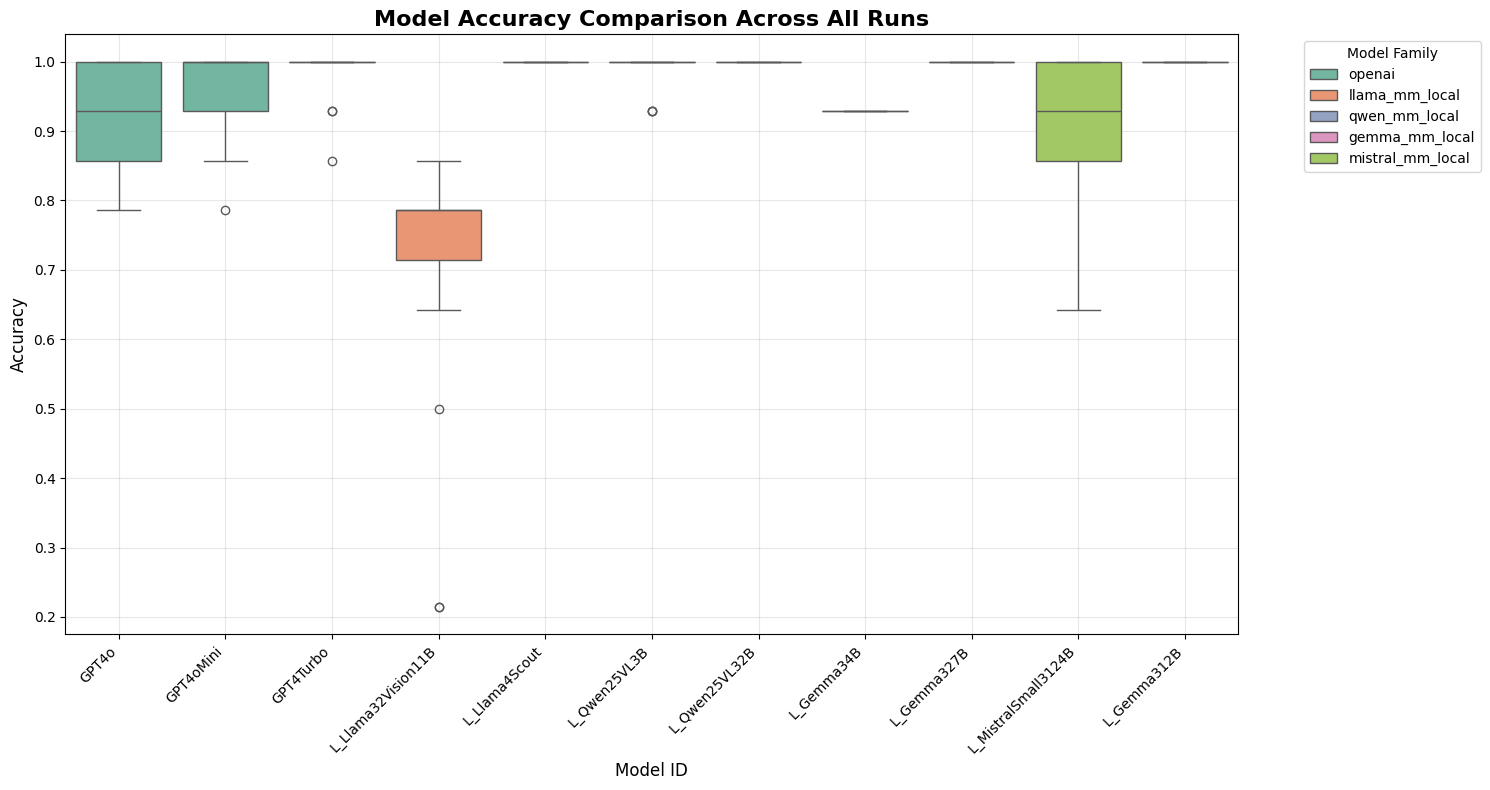


Summary Statistics by Model Family:
                  count      mean       std       min       25%       50%  \
model_family                                                                
gemma_mm_local     37.0  0.961390  0.036088  0.928571  0.928571  0.928571   
llama_mm_local     24.0  0.738095  0.198337  0.214286  0.714286  0.785714   
mistral_mm_local   21.0  0.908163  0.108663  0.642857  0.857143  0.928571   
openai             72.0  0.961310  0.061055  0.785714  0.928571  1.000000   
qwen_mm_local      36.0  0.994048  0.020022  0.928571  1.000000  1.000000   

                       75%  max  
model_family                     
gemma_mm_local    1.000000  1.0  
llama_mm_local    0.857143  1.0  
mistral_mm_local  1.000000  1.0  
openai            1.000000  1.0  
qwen_mm_local     1.000000  1.0  


In [28]:
# Create a boxplot with models on x-axis and accuracy on y-axis, colored by model family
# make sure that the accuracy is aggregated correctly over runs and models.
plt.figure(figsize=(15, 8))

# Create the boxplot
sns.boxplot(data=combined_df, x='model_id', y='accuracy', hue='model_family', palette='Set2')

# Customize the plot
plt.title('Model Accuracy Comparison Across All Runs', fontsize=16, fontweight='bold')
plt.xlabel('Model ID', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model Family', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

print("\nSummary Statistics by Model Family:")
print(combined_df.groupby('model_family')['accuracy'].describe())

In [29]:
# Avg accuracy per model across all runs
avg_accuracy_df = combined_df.groupby(["model_id", "model_family"])["accuracy"].mean().reset_index()
avg_accuracy_df = avg_accuracy_df.sort_values(by="accuracy", ascending=False)

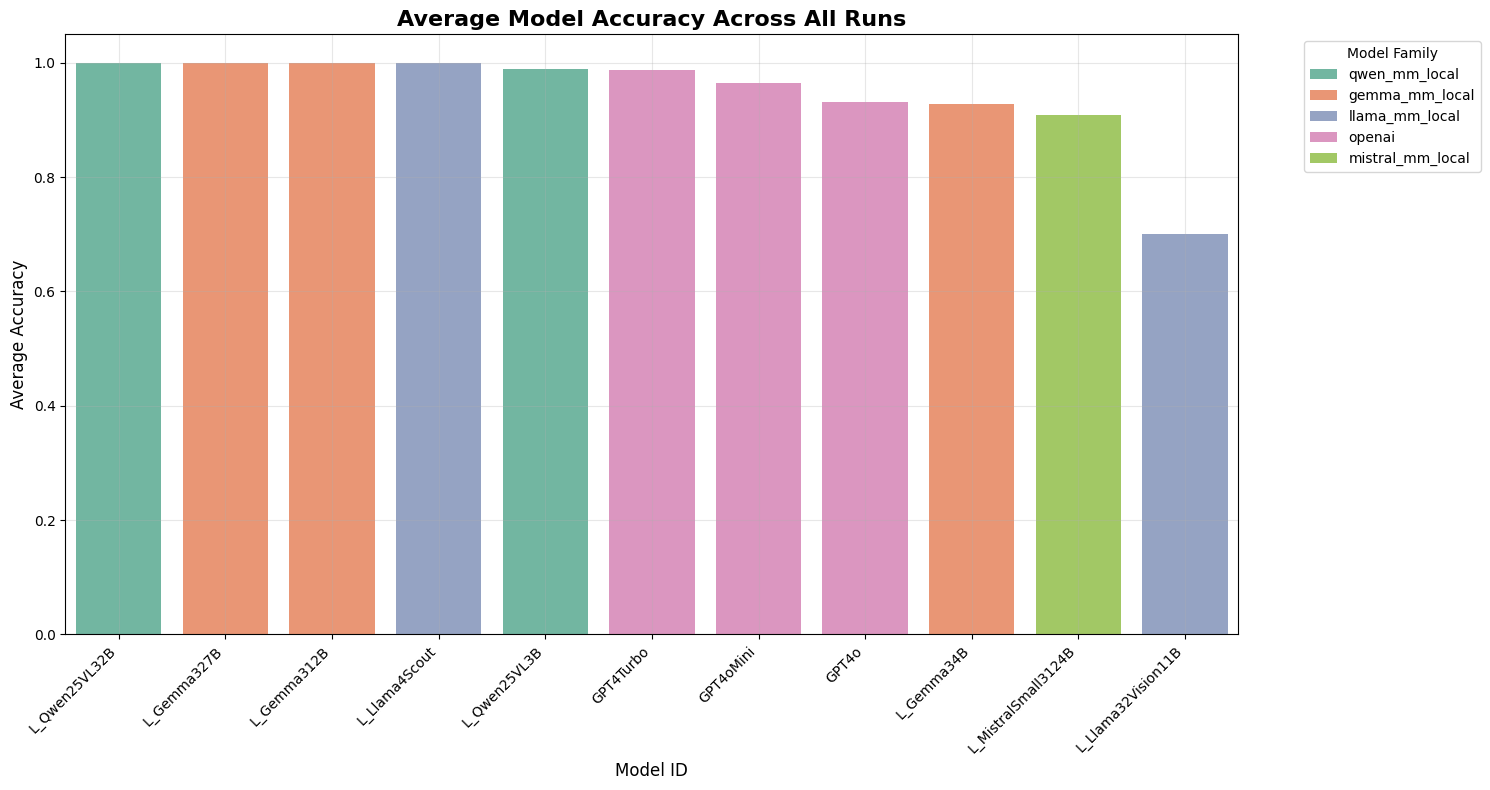

In [30]:
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_accuracy_df, x='model_id',
            y='accuracy', palette='Set2', hue='model_family')

plt.title('Average Model Accuracy Across All Runs', fontsize=16, fontweight='bold')
plt.xlabel('Model ID', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model Family', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show();